In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
#import pyplot as plt
from functools import reduce
from datetime import date
from datetime import datetime
#from dtale.views import startup
#import dtale

# Palette details
smileplus_palette = sns.color_palette(["#EE2737", "#507184", "#FBF9F9", "#18425A"])
sns.set_palette(smileplus_palette)



In [3]:
import matplotlib.rcsetup as rcsetup

In [4]:
dental = pd.read_csv('../data/Smileon.2021.10.17.csv', encoding = "latin-1", skiprows=2, low_memory=False)
dental.shape

(57860, 184)

In [5]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 81.2+ MB


In [6]:
#replace spaces with underscores to be able to read  column names
dental.columns = dental.columns.str.replace(' ','_')

In [7]:
#rename columns
dental = dental.rename(columns={'CallerNum': 'Patient'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Household_Income_Level': 'Household_Income_Level'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Gender': 'Gender'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Preferred_Language/Language_Needed': 'Language'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Race/Ethnicity': 'Race_Ethnicity'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_#_of_People_in_Household': 'People_in_Household'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Other_Language': 'Other_Language'})
dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_What_other_assistance_programs_are_you_on?': 'What_other_assistance_programs_are_you_on?'})
s = dental[~pd.isnull(dental['Language'])]['Language']

In [8]:
#dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_#_of_People_in_Household': 'People_in_Household'})
#dental = dental.rename(columns={'SMILE_ON_60+_Demographic_Information_-_Other_Language': 'Other_Language'})

In [9]:
dental.drop(['PhoneType', 'OrgNum', 'LinkedToCallReportNum'], axis=1)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,Patient,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,...,SMILE_ON_60+_Screening_-_Treatment_Urgency,SMILE_ON_60+_Screening_-_Untreated_Decay,SMILE_ON_60+_Site_Information_-_Enroller_ID,SMILE_ON_60+_Site_Information_-_Enroller_Location,SMILE_ON_60+_Treatment_Plan_-_Action:_Upload_After_Picture_on_Finish_Tab,SMILE_ON_60+_Treatment_Plan_-_Is_the_treatment_plan_completed?,SMILE_ON_60+_Treatment_Plan_-_Was_a_treatment_plan_developed?,"SMILE_ON_60+_Treatment_Plan_-_Was_the_enrollee_able_to_be_restored_to_function_(can_chew)_and_""social_six""_esthetics_(top_front_six_teeth_are_present_and_disease_free)",SMILE_ON_60+_Verification_of_Eligibility_-_Transportation_Arranged,SMILE_ON_60+_Verification_of_Eligibility_-_Verification_of_Eligibility
0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,SMILE ON 60+ Registration,9/30/2021 16:53,9/30/2021 16:53,0,4431194,123747,NaN,NaN,NaN,...,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,SMILE ON 60+ Clinical,9/30/2021 16:50,9/30/2021 16:51,1,2941341,161979,NaN,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
3,93115032,SMILE ON 60+ Clinical,9/30/2021 16:48,9/30/2021 16:49,1,3823933,161979,NaN,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
4,93114968,SMILE ON 60+ Clinical,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,NaN,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,SMILE ON 60+ Clinical,8/1/2018 8:00,8/1/2018 8:08,8,2385621,118821,NaN,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57856,67251452,SMILE ON 60+ Clinical,5/31/2018 8:27,5/31/2018 8:29,2,2631417,131347,NaN,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,Not available,No,No,Yes,NaN,NaN
57857,53192452,SMILE ON 60+ Registration,5/23/2018 14:11,5/23/2018 14:11,0,-1,60132,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,67915561,SMILE ON 60+ Registration,5/15/2018 9:06,5/15/2018 9:10,4,3239813,128174,NaN,NaN,NaN,...,NaN,NaN,Church Health Center - Memphis,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#drops columns that have only NAN values
dental.dropna(how='all', axis=1, inplace=True)

In [11]:
#drop duplicates in Patient (CallerNum)
duplicates = dental.duplicated(['Patient'], keep='first')
dental = dental[~duplicates]

In [12]:
if isinstance(dental, (pd.DatetimeIndex, pd.MultiIndex)):
	dental = dental.to_frame(index=False)

In [13]:
# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
dental = dental.reset_index().drop('index', axis=1, errors='ignore')
 # update columns to strings in case they are numbers
dental.columns = [str(c) for c in dental.columns] 

In [14]:
# too many columns with duplicates, i will merge these values into a couple
# 3 or more
# 4 or more
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; TennCare; SSI/SSDI'],'3 +')
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; TennCare; Section 8'],'3 +')
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; Section 8; SSI/SSDI '],'3 +')
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['TennCare; Section 8; SSI/SSDI'],'3 +')
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; TennCare; Section 8; SSI/SSDI'],'4 +')
# still messy, merge 2 +
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; TennCare'],'2 +')
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; SSI/SSDI'],'2 +')
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['TennCare; SSI/SSDI'],'2 +')
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; Section 8'],'2 +')
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['Section 8; SSI/SSDI'],'2 +')
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['TennCare; Section 8'],'2 +')
#dental['What_other_assistance_programs_are_you_on?'] = dental['What_other_assistance_programs_are_you_on?'].replace(['SNAP; Section 8; SSI/SSDI'],'3 +')

In [15]:
#drop what is not needed
dental.drop(dental.index[dental['People_in_Household'] == '13900'], inplace=True)
dental.drop(dental.index[dental['People_in_Household'] == '1886'], inplace=True)
dental.drop(dental.index[dental['People_in_Household'] == '1886'], inplace=True)
dental.drop(dental.index[dental['People_in_Household'] == '2864'], inplace=True)
dental.drop(dental.index[dental['People_in_Household'] == '8368'], inplace=True)
dental.drop(dental.index[dental['People_in_Household'] == '112'], inplace=True)
#dental.drop(dental.index[dental['People_in_Household'] == '0'], inplace=True)

In [16]:
dental = dental.dropna(subset=['People_in_Household'])

In [17]:
#change value 
dental['People_in_Household'] = dental['People_in_Household'].replace(['1_____'],'1')
dental['People_in_Household'] = dental['People_in_Household'].replace(['2_____'],'2')
dental['People_in_Household'] = dental['People_in_Household'].replace(['3_____'],'3')
dental['People_in_Household'] = dental['People_in_Household'].replace(['6_____'],'6')
dental['People_in_Household'] = dental['People_in_Household'].replace(['1.0'],'1')
dental['People_in_Household'] = dental['People_in_Household'].replace(['2.0'],'2')
dental['People_in_Household'] = dental['People_in_Household'].replace(['3.0'],'3')
dental['People_in_Household'] = dental['People_in_Household'].replace(['4.0'],'4')
dental['People_in_Household'] = dental['People_in_Household'].replace(['5.0'],'5')
dental['People_in_Household'] = dental['People_in_Household'].replace(['6.0'],'6')
dental['People_in_Household'] = dental['People_in_Household'].replace(['7.0'],'7')
dental['People_in_Household'] = dental['People_in_Household'].replace(['8.0'],'8')
dental['People_in_Household'] = dental['People_in_Household'].replace(['9.0'],'9')
dental['People_in_Household'] = dental['People_in_Household'].replace(['10.0'],'10')
dental['People_in_Household'] = dental['People_in_Household'].replace(['0'],'8')

In [18]:
#tried to change 0 - zero so i could drop it, but couldnt
#dental['People_in_Household'] = dental['People_in_Household'].replace(['0'],'zero')

In [19]:
dental['People_in_Household'] = dental['People_in_Household'].replace(['9'],'8')
dental['People_in_Household'] = dental['People_in_Household'].replace(['10'],'8')

In [20]:
#keep only up to 50k then lump all remaining
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$0 - $21 280'],'0 - 21280')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$21246-$24280'],'21246 - 24280')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$24281-$27315'],'24281 - 27315')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$28806-$32920'],'28806 - 32920')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$32921-$37035'],'32921 - 37035')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$41561-$46755'],'41561 - 46755')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$36366-$41560'],'36366 - 41560')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$43926-$50200'],'43926 - 50200')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$50201-$56475'],'50000 - 85000')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$59046-$67480'],'50000 - 85000')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$58841-$66195'],'50000 - 85000')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$51486-$58840'],'50000 - 85000')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$76121-$85635'],'50000 - 85000')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$84761-$95355'],'50000 - 85000')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$67481-$75915'],'50000 - 85000')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$66606-$76120'],'50000 - 85000')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['$74166-$84760'],'50000 - 85000')
dental['Household_Income_Level'] = dental['Household_Income_Level'].replace(['43926 - 50200'],'50000 - 85000')

In [21]:
#tried to drop zero - couldn't 
#dental.drop(dental.index[dental['People_in_Household'] == 'zero'], inplace=True)

In [22]:
dental.drop(dental.index[dental['People_in_Household'] == NaN], inplace=True)

In [23]:
dental['People_in_Household'] = dental['People_in_Household'].astype(int)

In [24]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10211 entries, 0 to 10710
Columns: 130 entries, CallReportNum to SMILE_ON_60+_Verification_of_Eligibility_-_Verification_of_Eligibility
dtypes: float64(49), int32(1), int64(6), object(74)
memory usage: 10.5+ MB


In [25]:
#Average of people in a household?
# 'SMILE_ON_60+_Demographic_Information_-_#_of_People_in_Household''
householdnumber = dental['People_in_Household'].value_counts()
print(householdnumber)

1    6446
2    2733
3     507
4     260
5     153
6      57
7      32
8      23
Name: People_in_Household, dtype: int64


In [26]:
#obtain Household Income Level
#'SMILE_ON_60+_Demographic_Information_-_Household_Income_Level'
houseincome = dental['Household_Income_Level'].value_counts()
print(houseincome)

0 - 21280        7348
21246 - 24280    1354
24281 - 27315     432
28806 - 32920     390
32921 - 37035     145
41561 - 46755      79
36366 - 41560      70
50000 - 85000      69
Name: Household_Income_Level, dtype: int64


In [27]:
#df.sort_values(by=['col1', 'col2'])
#dental = dental.sort_values(by=['People_in_Household','Household_Income_Level'])

In [28]:
#sns.set_theme(style="whitegrid")
#f, ax = plt.subplots(figsize=(12, 8))
#sns.set_color_codes("pastel")
#sns.set_style('darkgrid')
#sns.barplot(x='People_in_Household', y=dental.People_in_Household.value_counts(), data=dental, 
#             color="b")
#ax = plt.axes()
#ax.set_facecolor("#FBF9F9")
#ax = sns.countplot(x="People_in_Household", data=dental)
#ax.set(xlim=(1, 10), ylabel="",
#xlabel="{People_in_Household}")
#sns.despine(left=True, bottom=True)

In [29]:
#dental1 = dental.groupby(['Household_Income_Level'])['People_in_Household'].aggregate(np.median).reset_index().sort_values('People_in_Household')
#sns.barplot(x='Household_Income_Level', y='People_in_Household', data=dental) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
#plt.show()

In [30]:
#dental1 = dental.groupby(['Household_Income_Level'])['People_in_Household'].aggregate(np.median).reset_index().sort_values('People_in_Household')
#sns.scatterplot(x='People_in_Household', y="Household_Income_Level", data=dental1) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
#plt.show()

In [31]:
filters = [(dental.People_in_Household == 1),
          (dental.People_in_Household == 2),
          (dental.People_in_Household == 3),
          (dental.People_in_Household == 4),
          (dental.People_in_Household == 5),
          (dental.People_in_Household == 6),
          (dental.People_in_Household == 7),
          (dental.People_in_Household == 8),
          (dental.People_in_Household == 9),
          (dental.People_in_Household == 10)]

values = ["17774",
         "24040",
         "30305",
         "36570",
         "42835",
         "49100",
         "55366",
         "61631",
         "61631",
         "61631",
         ]

dental["Poverty_Line"] = np.select(filters, values)
dental.Poverty_Line

0        17774
1        17774
2        17774
3        17774
4        17774
         ...  
10693    17774
10694    17774
10695    17774
10708    17774
10710    24040
Name: Poverty_Line, Length: 10211, dtype: object

In [32]:
dental['Poverty_Line'] = dental['Poverty_Line'].astype(int)

In [33]:
povertylines = dental['Poverty_Line'].value_counts()
print(povertylines)

17774    6446
24040    2733
30305     507
36570     260
42835     153
49100      57
55366      32
61631      23
Name: Poverty_Line, dtype: int64


In [34]:
householdnumber = dental['People_in_Household'].value_counts()
print(householdnumber)

1    6446
2    2733
3     507
4     260
5     153
6      57
7      32
8      23
Name: People_in_Household, dtype: int64


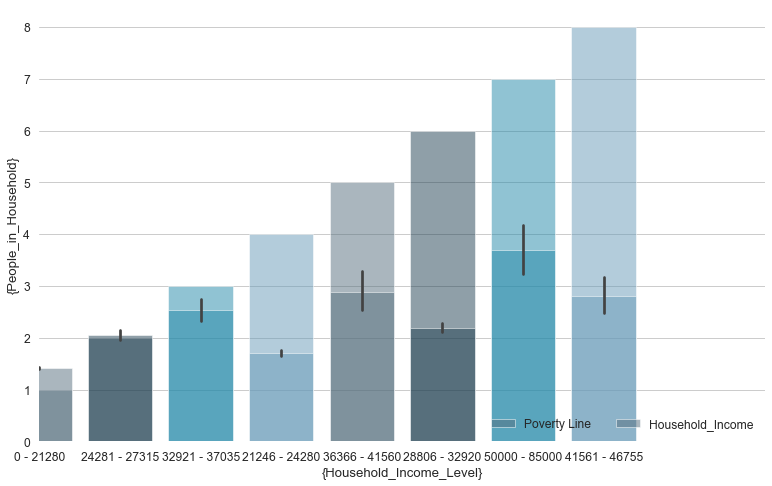

In [35]:
#sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.1, style="whitegrid")
colors = ["#507184","#18425A","#0D94BF","#5b9fc6"]


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 8))
#ax.set_facecolor("#FBF9F9")
#sns.set_palette("Paired")

# Plot the total crashes
#smileplus_palette =sns.color_palette(["#EE2737", "#507184", "#FBF9F9", "#18425A"])
#sns.set_palette(smileplus_palette)
#sns.set_color_codes(palette=smileplus_palette)
sns.barplot(x='Poverty_Line', y="People_in_Household", data=dental, palette=colors,
            label="Poverty Line", alpha = 0.5  )

#sns.lineplot(data = dental['Poverty_Line'], marker='o', sort = False, ax1=ax)
#ax2 = ax.twinx()

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.color_palette(["#EE2737", "#507184", "#FBF9F9", "#18425A"])
sns.barplot(x="Household_Income_Level", y="People_in_Household", data=dental, palette=colors,
            label="Household_Income",  alpha=0.5 )

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=False)
ax.set(xlim=(0, 9), ylabel="{People_in_Household}",
xlabel="{Household_Income_Level}")
sns.despine(left=True, bottom=True)

##### sns.barplot(x=householdnumber.index, y=householdnumber.values, alpha=0.8)

In [36]:
#Enrolled in OTHER assistance programs, which ones?
# 'SMILE_ON_60+_DemographicInformation-_What_other_assistance_programs_are_you_on?'
otherprograms = dental['What_other_assistance_programs_are_you_on?'].value_counts()
print(otherprograms)

SSI/SSDI                               1962
SNAP                                    729
TennCare                                433
SNAP; TennCare                          325
SNAP; SSI/SSDI                          290
SNAP; TennCare; SSI/SSDI                279
TennCare; SSI/SSDI                      246
Section 8                               175
SNAP; Section 8                         120
SNAP; TennCare; Section 8                96
SNAP; TennCare; Section 8; SSI/SSDI      92
Section 8; SSI/SSDI                      68
TennCare; Section 8                      50
SNAP; Section 8; SSI/SSDI                45
TennCare; Section 8; SSI/SSDI            40
Name: What_other_assistance_programs_are_you_on?, dtype: int64


In [37]:
#drop nan values to avoid errors when splitting columns 
assistance_drop = dental.dropna(subset=['What_other_assistance_programs_are_you_on?'])

In [38]:
assistance_drop['What_other_assistance_programs_are_you_on?'].value_counts()

SSI/SSDI                               1962
SNAP                                    729
TennCare                                433
SNAP; TennCare                          325
SNAP; SSI/SSDI                          290
SNAP; TennCare; SSI/SSDI                279
TennCare; SSI/SSDI                      246
Section 8                               175
SNAP; Section 8                         120
SNAP; TennCare; Section 8                96
SNAP; TennCare; Section 8; SSI/SSDI      92
Section 8; SSI/SSDI                      68
TennCare; Section 8                      50
SNAP; Section 8; SSI/SSDI                45
TennCare; Section 8; SSI/SSDI            40
Name: What_other_assistance_programs_are_you_on?, dtype: int64

In [39]:
# with this, i will make 4 new columns, this will separate the values so i can count them 
dental['has_SSI_SSDI']=pd.np.where(dental['What_other_assistance_programs_are_you_on?'].str.contains("SSI/SSDI"),1,0)
dental['has_SNAP']=pd.np.where(dental['What_other_assistance_programs_are_you_on?'].str.contains("SNAP"),1,0)
dental['has_TennCare']=pd.np.where(dental['What_other_assistance_programs_are_you_on?'].str.contains("TennCare"),1,0)
dental['has_Section 8']=pd.np.where(dental['What_other_assistance_programs_are_you_on?'].str.contains("Section 8"),1,0)

<ipython-input-39-1fa96138efbc>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dental['has_SSI_SSDI']=pd.np.where(dental['What_other_assistance_programs_are_you_on?'].str.contains("SSI/SSDI"),1,0)
<ipython-input-39-1fa96138efbc>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dental['has_SNAP']=pd.np.where(dental['What_other_assistance_programs_are_you_on?'].str.contains("SNAP"),1,0)
<ipython-input-39-1fa96138efbc>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dental['has_TennCare']=pd.np.where(dental['What_other_assistance_programs_are_you_on?'].str.contains("TennCare"),1,0)
<ipython-input-39-1fa96138efbc>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import

In [40]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10211 entries, 0 to 10710
Columns: 135 entries, CallReportNum to has_Section 8
dtypes: float64(49), int32(6), int64(6), object(74)
memory usage: 10.7+ MB


In [41]:
#incorrect number of rows, its not supposed to be 10211 after you drop nan
dental['has_Section 8']

0        0
1        1
2        1
3        1
4        0
        ..
10693    1
10694    1
10695    0
10708    0
10710    1
Name: has_Section 8, Length: 10211, dtype: int32

In [42]:
#assistance_drop has the correct values because nan was removed - dental shows incorrect data 
#assistance_drop['has_Section 8'].value_counts()

In [43]:
len(assistance_drop[assistance_drop['What_other_assistance_programs_are_you_on?'].str.contains('SSI/SSDI')])

3022

In [44]:
#assistance_drop['has_SSI_SSDI'].value_counts()

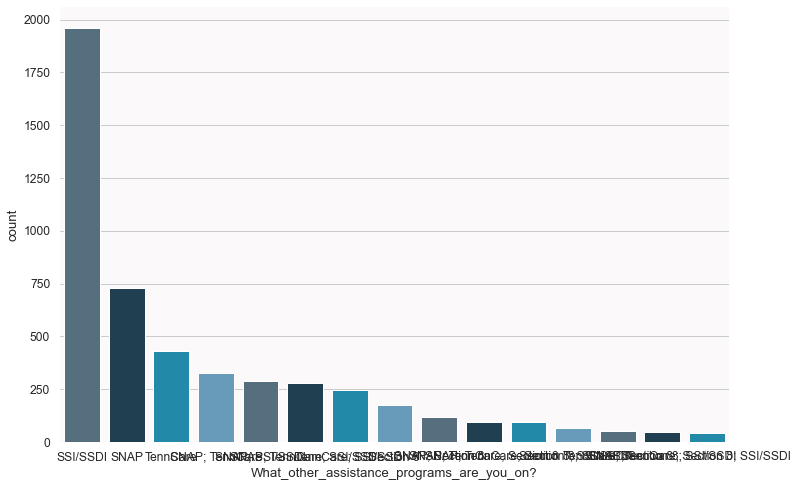

In [45]:
#sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
#sns.set_color_codes("pastel")
#sns.set_style('darkgrid')
#sns.barplot(x='People_in_Household', y=dental.People_in_Household.value_counts(), data=dental, 
#             color="b")
ax = plt.axes()
ax.set_facecolor("#FBF9F9")
ax = sns.countplot(x='What_other_assistance_programs_are_you_on?', data=dental, palette=colors, order = dental['What_other_assistance_programs_are_you_on?'].value_counts().index)
#ax.set(xlim=(1, 10), ylabel="",
#xlabel="{People_in_Household}")
sns.despine(left=True, bottom=True)

In [46]:
#d = dtale.show(dental)
# open it in a new window in browser
#d.open_browser()

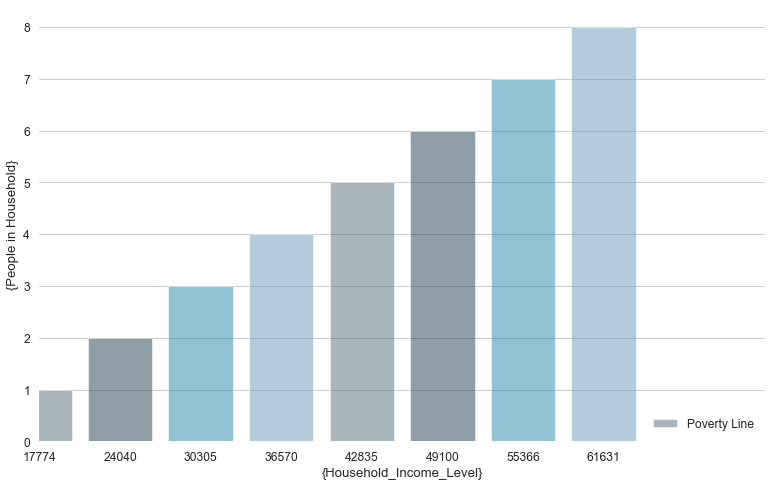

In [47]:
#sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.1, style="whitegrid")
colors = ["#507184","#18425A","#0D94BF","#5b9fc6"]


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 8))
#ax.set_facecolor("#FBF9F9")
#sns.set_palette("Paired")

# Plot the total crashes
#smileplus_palette =sns.color_palette(["#EE2737", "#507184", "#FBF9F9", "#18425A"])
#sns.set_palette(smileplus_palette)
#sns.set_color_codes(palette=smileplus_palette)
sns.barplot(x="Poverty_Line", y="People_in_Household", data=dental, palette=colors,
            label="Poverty Line", alpha = 0.5  )

#sns.lineplot(data = dental['Poverty_Line'], marker='o', sort = False, ax1=ax)
#ax2 = ax.twinx()

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.color_palette(["#EE2737", "#507184", "#FBF9F9", "#18425A"])
#sns.barplot(x="Household_Income_Level", y="People_in_Household", data=dental, palette=colors,
 #           label="Household_Income",  alpha=0.5 )

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=False)
ax.set(xlim=(0, 9), ylabel="{People in Household}",
xlabel="{Household_Income_Level}")
sns.despine(left=True, bottom=True)

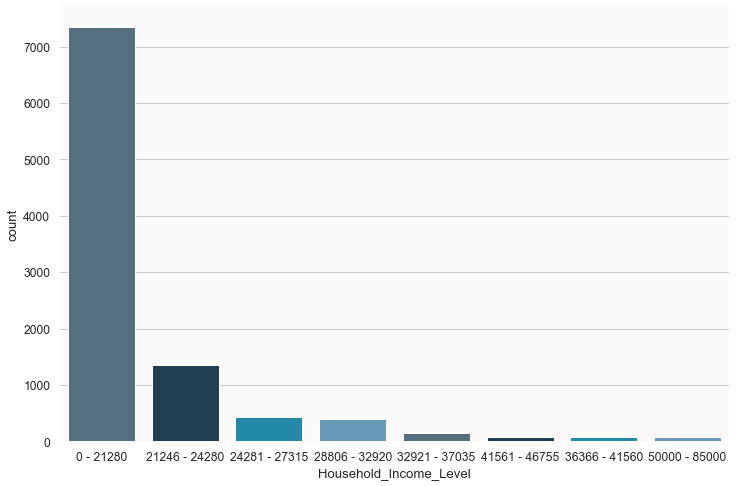

In [48]:
#sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
#sns.set_color_codes("pastel")
#sns.set_style('darkgrid')
#sns.barplot(x='People_in_Household', y=dental.People_in_Household.value_counts(), data=dental, 
#             color="b")
ax = plt.axes()
ax.set_facecolor("#FBF9F9")
ax = sns.countplot(x='Household_Income_Level', data=dental, palette=colors, order = dental['Household_Income_Level'].value_counts().index)
#ax.set(xlim=(1, 10), ylabel="",
#xlabel="{People_in_Household}")
sns.despine(left=True, bottom=True)

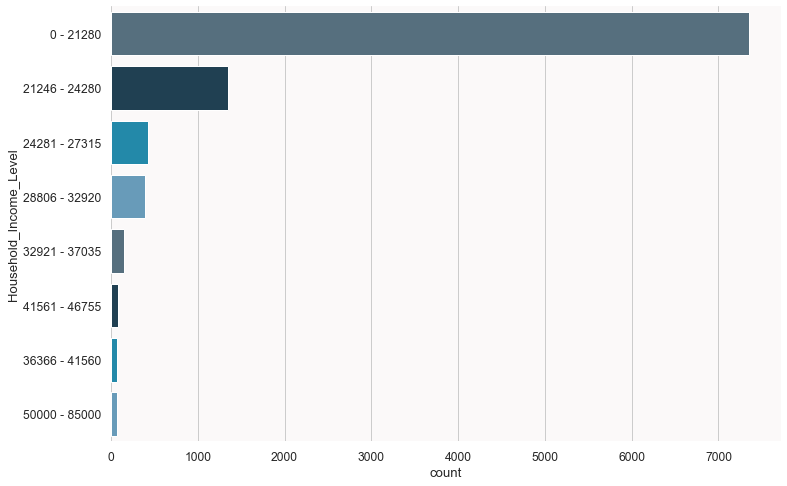

In [49]:
#sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
#sns.set_color_codes("pastel")
#sns.set_style('darkgrid')
#sns.barplot(x='People_in_Household', y=dental.People_in_Household.value_counts(), data=dental, 
#             color="b")
ax = plt.axes()
ax.set_facecolor("#FBF9F9")
ax = sns.countplot(y='Household_Income_Level', data=dental, palette=colors, order = dental['Household_Income_Level'].value_counts().index)
#ax.set(xlim=(1, 10), ylabel="",
#xlabel="{People_in_Household}")
sns.despine(left=True, bottom=True)

<AxesSubplot:>

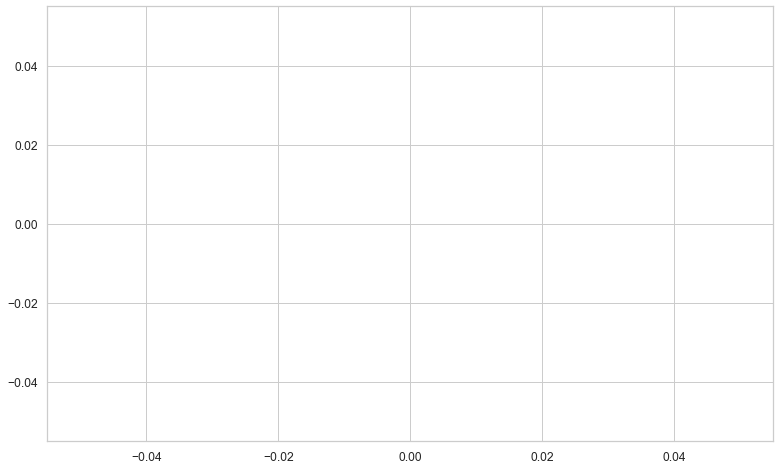

In [50]:
sns.scatterplot(data=dental, x=dental.Household_Income_Level.value_counts(), y='Poverty_Line')

<AxesSubplot:>

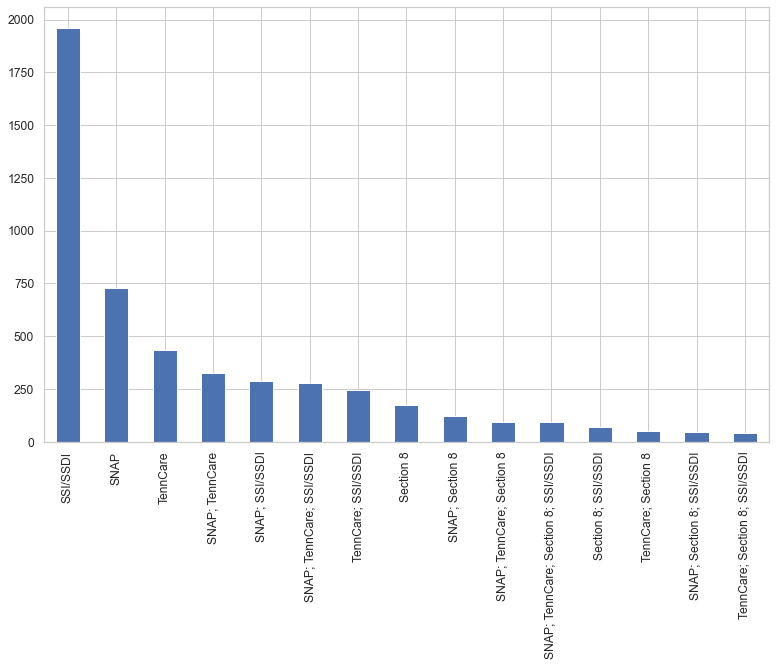

In [51]:
assistance_drop['What_other_assistance_programs_are_you_on?'].value_counts().plot.bar()

In [52]:
#dental_ssi = assistance_drop[assistance_drop['What_other_assistance_programs_are_you_on?'].str.contains('SSI/SSDI')]
#dental_ssi['has_SSI_SSDI'].value_counts().plot(kind='barh')
#plt.gca().invert_yaxis()
#plt.show()

In [53]:
#
my_series = assistance_drop['What_other_assistance_programs_are_you_on?'].squeeze()

print(my_series)
print (type(my_series))

0        SNAP; SSI/SSDI
4              SSI/SSDI
7              TennCare
8              TennCare
16                 SNAP
              ...      
10686         Section 8
10687         Section 8
10690          SSI/SSDI
10695          TennCare
10708          SSI/SSDI
Name: What_other_assistance_programs_are_you_on?, Length: 4950, dtype: object
<class 'pandas.core.series.Series'>


In [54]:
dental_list=list(dental)
print(dental_list)

['CallReportNum', 'ReportVersion', 'LinkedToCallReportNum', 'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallLength', 'Patient', 'PhoneWorkerNum', 'CityName', 'CountyName', 'StateProvince', 'CountryName', 'PostalCode', 'PhoneType', 'ThirdPartyStateProvince', 'Narrative', 'Feedback', 'EnteredByWorkerNum', 'EnteredOn', 'Reviewed', 'FeedbackStatus', 'FeedbackFromPhoneWorkerNum', 'FeedbackFromPhoneWorkerName', 'ReferralsMade', 'OrgNum', 'People_in_Household', 'Birth_Year', 'Other_Language', 'SMILE_ON_60+_Notes_(Optional)_-_Notes', 'SMILE_ON_60+_Oral_Care_Encounter_-_1351_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_1354_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2140_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2150_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2160_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2161_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_230_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2330_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_

In [55]:
#trying another way to explode, dropping has columns to avoid duplx
dental.drop(['has_SSI_SSDI', 'has_SNAP', 'has_TennCare', 'has_Section 8'], axis=1)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,Patient,PhoneWorkerNum,CityName,CountyName,...,SMILE_ON_60+_Screening_-_Untreated_Decay,SMILE_ON_60+_Site_Information_-_Enroller_ID,SMILE_ON_60+_Site_Information_-_Enroller_Location,SMILE_ON_60+_Treatment_Plan_-_Action:_Upload_After_Picture_on_Finish_Tab,SMILE_ON_60+_Treatment_Plan_-_Is_the_treatment_plan_completed?,SMILE_ON_60+_Treatment_Plan_-_Was_a_treatment_plan_developed?,"SMILE_ON_60+_Treatment_Plan_-_Was_the_enrollee_able_to_be_restored_to_function_(can_chew)_and_""social_six""_esthetics_(top_front_six_teeth_are_present_and_disease_free)",SMILE_ON_60+_Verification_of_Eligibility_-_Transportation_Arranged,SMILE_ON_60+_Verification_of_Eligibility_-_Verification_of_Eligibility,Poverty_Line
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17774
1,93115188,SMILE ON 60+ Registration,NaN,9/30/2021 16:53,9/30/2021 16:53,0,4431194,123747,Nashville,Davidson,...,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN,NaN,17774
2,93115081,SMILE ON 60+ Clinical,NaN,9/30/2021 16:50,9/30/2021 16:51,1,2941341,161979,Memphis,Shelby,...,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN,17774
3,93115032,SMILE ON 60+ Clinical,NaN,9/30/2021 16:48,9/30/2021 16:49,1,3823933,161979,Memphis,Shelby,...,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN,17774
4,93114968,SMILE ON 60+ Clinical,NaN,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,Memphis,Shelby,...,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN,17774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693,55266195,SMILE ON 60+ Registration,NaN,8/7/2018 11:54,8/7/2018 11:58,4,2391078,116749,Manchester,Coffee,...,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN,17774
10694,55263902,SMILE ON 60+ Clinical,NaN,8/7/2018 10:49,8/7/2018 10:50,1,2384922,116749,Murfreesboro,Rutherford,...,No,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,17774
10695,55262655,SMILE ON 60+ Registration,NaN,8/7/2018 10:13,8/7/2018 10:16,3,2390849,116749,Murfreesboro,Rutherford,...,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN,17774
10708,55109316,SMILE ON 60+ Registration,NaN,8/1/2018 11:08,8/1/2018 11:11,3,2385054,118820,Nashville,Davidson,...,NaN,Interfaith Dental Clinic - Nashville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN,17774


In [56]:
#need to fix how the drop was named, then fix this "assistance_drop" so that those 'dropped' values can be added to the merge
dental = dental.merge(assistance_drop, how = 'left', on = ['CallReportNum', 'ReportVersion', 'LinkedToCallReportNum', 'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallLength', 'Patient', 'PhoneWorkerNum', 'CityName', 'CountyName', 'StateProvince', 'CountryName', 'PostalCode', 'PhoneType', 'ThirdPartyStateProvince', 'Narrative', 'Feedback', 'EnteredByWorkerNum', 'EnteredOn', 'Reviewed', 'FeedbackStatus', 'FeedbackFromPhoneWorkerNum', 'FeedbackFromPhoneWorkerName', 'ReferralsMade', 'OrgNum', 'People_in_Household', 'Birth_Year', 'Other_Language', 'SMILE_ON_60+_Notes_(Optional)_-_Notes', 'SMILE_ON_60+_Oral_Care_Encounter_-_1351_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_1354_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2140_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2150_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2160_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2161_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_230_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2330_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2331_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2332_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2335_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2390_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2391_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2392_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2393_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2394_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2915_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2920_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2933_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2940_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2950_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2954_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2980_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_3220_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_4341_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_4342_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_6930_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_6980_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7111_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7140_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7210_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7220_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7230_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7240_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7241_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7250_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7261_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7286_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7310_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7311_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7320_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7321_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7410_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7411_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7471_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7510_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7971_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7972_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_9110_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_9951_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_Lab_Assist_narrative', 'SMILE_ON_60+_Screening_-_Last_Screening_Date', 'SMILE_ON_60+_Verification_of_Eligibility_-_Verification_Date', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Are_you_limited_in_what_you_can_eat?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Dental_Clinic', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Did_the_client_commit_to_referral?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Did_you_help_in_these_other_areas?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Do_you_need_help_in_these_other_areas?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Have_you_ever_felt_that_the_appearance_of_your_mouth_and_teeth_affected_your_quality_of_life?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_How_would_you_describe_the_condition_of_your_mouth_and_teeth?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_What_is_the_next_step_for_client_encounter?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_What_is_the_next_step_for_clients_encounter?', 'SMILE_ON_60+_Case_Management_Information_-_Dental_Clinic', 'SMILE_ON_60+_Case_Management_Information_-_Transportation_Barriers', 'SMILE_ON_60+_Case_Management_Information_-_What_barriers_have_kept_you_from_finding_a_consistent_dental_home?_(Select_all_that_apply)', 'SMILE_ON_60+_Case_Management_Information_-_What_is_the_outcome_for_the_client?', 'SMILE_ON_60+_Clinic_Information_-_Action:_Upload_Before_Picture_on_Finish_Tab', 'SMILE_ON_60+_Clinic_Information_-_Is_patient_of_record_date_if_yes_last_seen?', 'SMILE_ON_60+_Clinic_Information_-_Was_initial_appointment_made?', 'SMILE_ON_60+_Clinic_Information_-_Was_initial_transportation_assistance_or_referral_provided?', 'Gender', 'Household_Income_Level', 'SMILE_ON_60+_Demographic_Information_-_How_did_you_first_hear_about_the_SMILE_ON_60+_program?', 'Language', 'Race_Ethnicity', 'What_other_assistance_programs_are_you_on?', 'SMILE_ON_60+_Demographic_Information_-_When_is_the_last_time_you_visited_your_dentist?', 'SMILE_ON_60+_Oral_Care_Encounter_-_What_care_was_provided_to_the_enrollee?_(Select_all_that_apply)', 'SMILE_ON_60+_Presumptive_Eligibility_-_Dental_Insurance?', 'SMILE_ON_60+_Presumptive_Eligibility_-_Do_they_pre-qualify_for_SMILE_ON_60+?', 'SMILE_ON_60+_Presumptive_Eligibility_-_What_is_the_next_step_for_clients_encounter?_', 'SMILE_ON_60+_Presumptive_Eligibility_-_What_is_the_next_step_for_clients_encounter?', 'SMILE_ON_60+_Screening_-_#_of_Lower_Natural_Teeth', 'SMILE_ON_60+_Screening_-_#_of_Upper_Natural_Teeth', 'SMILE_ON_60+_Screening_-_Do_you_have_removable_dentures?', 'SMILE_ON_60+_Screening_-_Do_you_usually_wear_your_denture(s)_when_you_eat?', 'SMILE_ON_60+_Screening_-_Experienced_any_problems_related_to_mouth/teeth_during_past_12_months?', 'SMILE_ON_60+_Screening_-_How_often_do_you_brush_your_teeth?', 'SMILE_ON_60+_Screening_-_Need_for_Periodontal_Care', 'SMILE_ON_60+_Screening_-_Root_Fragments', 'SMILE_ON_60+_Screening_-_Suspicious_Soft_Tissue_Lesions', 'SMILE_ON_60+_Screening_-_Treatment_Urgency', 'SMILE_ON_60+_Screening_-_Untreated_Decay', 'SMILE_ON_60+_Site_Information_-_Enroller_ID', 'SMILE_ON_60+_Site_Information_-_Enroller_Location', 'SMILE_ON_60+_Treatment_Plan_-_Action:_Upload_After_Picture_on_Finish_Tab', 'SMILE_ON_60+_Treatment_Plan_-_Is_the_treatment_plan_completed?', 'SMILE_ON_60+_Treatment_Plan_-_Was_a_treatment_plan_developed?', 'SMILE_ON_60+_Treatment_Plan_-_Was_the_enrollee_able_to_be_restored_to_function_(can_chew)_and_"social_six"_esthetics_(top_front_six_teeth_are_present_and_disease_free)', 'SMILE_ON_60+_Verification_of_Eligibility_-_Transportation_Arranged', 'SMILE_ON_60+_Verification_of_Eligibility_-_Verification_of_Eligibility', 'Poverty_Line'])

In [57]:
print(dental)

       CallReportNum              ReportVersion LinkedToCallReportNum  \
0           93115324  SMILE ON 60+ Registration                   NaN   
1           93115188  SMILE ON 60+ Registration                   NaN   
2           93115081      SMILE ON 60+ Clinical                   NaN   
3           93115032      SMILE ON 60+ Clinical                   NaN   
4           93114968      SMILE ON 60+ Clinical                   NaN   
...              ...                        ...                   ...   
10206       55266195  SMILE ON 60+ Registration                   NaN   
10207       55263902      SMILE ON 60+ Clinical                   NaN   
10208       55262655  SMILE ON 60+ Registration                   NaN   
10209       55109316  SMILE ON 60+ Registration                   NaN   
10210       55106455  SMILE ON 60+ Registration                   NaN   

      CallDateAndTimeStart CallDateAndTimeEnd  CallLength  Patient  \
0          9/30/2021 16:56    9/30/2021 16:57        

In [58]:
assistance_drop = assistance_drop.merge(dental, how = 'left', on = ['CallReportNum', 'ReportVersion', 'LinkedToCallReportNum', 'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallLength', 'Patient', 'PhoneWorkerNum', 'CityName', 'CountyName', 'StateProvince', 'CountryName', 'PostalCode', 'PhoneType', 'ThirdPartyStateProvince', 'Narrative', 'Feedback', 'EnteredByWorkerNum', 'EnteredOn', 'Reviewed', 'FeedbackStatus', 'FeedbackFromPhoneWorkerNum', 'FeedbackFromPhoneWorkerName', 'ReferralsMade', 'OrgNum', 'People_in_Household', 'Birth_Year', 'Other_Language', 'SMILE_ON_60+_Notes_(Optional)_-_Notes', 'SMILE_ON_60+_Oral_Care_Encounter_-_1351_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_1354_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2140_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2150_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2160_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2161_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_230_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2330_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2331_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2332_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2335_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2390_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2391_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2392_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2393_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2394_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2915_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2920_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2933_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2940_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2950_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2954_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_2980_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_3220_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_4341_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_4342_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_6930_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_6980_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7111_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7140_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7210_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7220_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7230_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7240_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7241_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7250_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7261_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7286_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7310_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7311_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7320_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7321_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7410_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7411_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7471_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7510_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7971_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_7972_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_9110_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_9951_-_Quantity', 'SMILE_ON_60+_Oral_Care_Encounter_-_Lab_Assist_narrative', 'SMILE_ON_60+_Screening_-_Last_Screening_Date', 'SMILE_ON_60+_Verification_of_Eligibility_-_Verification_Date', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Are_you_limited_in_what_you_can_eat?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Dental_Clinic', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Did_the_client_commit_to_referral?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Did_you_help_in_these_other_areas?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Do_you_need_help_in_these_other_areas?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_Have_you_ever_felt_that_the_appearance_of_your_mouth_and_teeth_affected_your_quality_of_life?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_How_would_you_describe_the_condition_of_your_mouth_and_teeth?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_What_is_the_next_step_for_client_encounter?', 'SMILE_ON_60+_Base-line_Oral_and_Conditions_Questions_-_What_is_the_next_step_for_clients_encounter?', 'SMILE_ON_60+_Case_Management_Information_-_Dental_Clinic', 'SMILE_ON_60+_Case_Management_Information_-_Transportation_Barriers', 'SMILE_ON_60+_Case_Management_Information_-_What_barriers_have_kept_you_from_finding_a_consistent_dental_home?_(Select_all_that_apply)', 'SMILE_ON_60+_Case_Management_Information_-_What_is_the_outcome_for_the_client?', 'SMILE_ON_60+_Clinic_Information_-_Action:_Upload_Before_Picture_on_Finish_Tab', 'SMILE_ON_60+_Clinic_Information_-_Is_patient_of_record_date_if_yes_last_seen?', 'SMILE_ON_60+_Clinic_Information_-_Was_initial_appointment_made?', 'SMILE_ON_60+_Clinic_Information_-_Was_initial_transportation_assistance_or_referral_provided?', 'Gender', 'Household_Income_Level', 'SMILE_ON_60+_Demographic_Information_-_How_did_you_first_hear_about_the_SMILE_ON_60+_program?', 'Language', 'Race_Ethnicity', 'What_other_assistance_programs_are_you_on?', 'SMILE_ON_60+_Demographic_Information_-_When_is_the_last_time_you_visited_your_dentist?', 'SMILE_ON_60+_Oral_Care_Encounter_-_What_care_was_provided_to_the_enrollee?_(Select_all_that_apply)', 'SMILE_ON_60+_Presumptive_Eligibility_-_Dental_Insurance?', 'SMILE_ON_60+_Presumptive_Eligibility_-_Do_they_pre-qualify_for_SMILE_ON_60+?', 'SMILE_ON_60+_Presumptive_Eligibility_-_What_is_the_next_step_for_clients_encounter?_', 'SMILE_ON_60+_Presumptive_Eligibility_-_What_is_the_next_step_for_clients_encounter?', 'SMILE_ON_60+_Screening_-_#_of_Lower_Natural_Teeth', 'SMILE_ON_60+_Screening_-_#_of_Upper_Natural_Teeth', 'SMILE_ON_60+_Screening_-_Do_you_have_removable_dentures?', 'SMILE_ON_60+_Screening_-_Do_you_usually_wear_your_denture(s)_when_you_eat?', 'SMILE_ON_60+_Screening_-_Experienced_any_problems_related_to_mouth/teeth_during_past_12_months?', 'SMILE_ON_60+_Screening_-_How_often_do_you_brush_your_teeth?', 'SMILE_ON_60+_Screening_-_Need_for_Periodontal_Care', 'SMILE_ON_60+_Screening_-_Root_Fragments', 'SMILE_ON_60+_Screening_-_Suspicious_Soft_Tissue_Lesions', 'SMILE_ON_60+_Screening_-_Treatment_Urgency', 'SMILE_ON_60+_Screening_-_Untreated_Decay', 'SMILE_ON_60+_Site_Information_-_Enroller_ID', 'SMILE_ON_60+_Site_Information_-_Enroller_Location', 'SMILE_ON_60+_Treatment_Plan_-_Action:_Upload_After_Picture_on_Finish_Tab', 'SMILE_ON_60+_Treatment_Plan_-_Is_the_treatment_plan_completed?', 'SMILE_ON_60+_Treatment_Plan_-_Was_a_treatment_plan_developed?', 'SMILE_ON_60+_Treatment_Plan_-_Was_the_enrollee_able_to_be_restored_to_function_(can_chew)_and_"social_six"_esthetics_(top_front_six_teeth_are_present_and_disease_free)', 'SMILE_ON_60+_Verification_of_Eligibility_-_Transportation_Arranged', 'SMILE_ON_60+_Verification_of_Eligibility_-_Verification_of_Eligibility', 'Poverty_Line'])

In [59]:
print(assistance_drop)

      CallReportNum              ReportVersion LinkedToCallReportNum  \
0          93115324  SMILE ON 60+ Registration                   NaN   
1          93114968      SMILE ON 60+ Clinical                   NaN   
2          93114741  SMILE ON 60+ Registration                   NaN   
3          93114520      SMILE ON 60+ Clinical                   NaN   
4          93110203      SMILE ON 60+ Clinical                   NaN   
...             ...                        ...                   ...   
4945       55321240      SMILE ON 60+ Clinical                   NaN   
4946       55301182  SMILE ON 60+ Registration                   NaN   
4947       55295541  SMILE ON 60+ Registration                   NaN   
4948       55262655  SMILE ON 60+ Registration                   NaN   
4949       55109316  SMILE ON 60+ Registration                   NaN   

     CallDateAndTimeStart CallDateAndTimeEnd  CallLength  Patient  \
0         9/30/2021 16:56    9/30/2021 16:57           1  3638169 

In [60]:
assistance_drop['has_SSI_SSDI'].value_counts()

1    3022
0    1928
Name: has_SSI_SSDI, dtype: int64

In [61]:
print(assistance_drop)

      CallReportNum              ReportVersion LinkedToCallReportNum  \
0          93115324  SMILE ON 60+ Registration                   NaN   
1          93114968      SMILE ON 60+ Clinical                   NaN   
2          93114741  SMILE ON 60+ Registration                   NaN   
3          93114520      SMILE ON 60+ Clinical                   NaN   
4          93110203      SMILE ON 60+ Clinical                   NaN   
...             ...                        ...                   ...   
4945       55321240      SMILE ON 60+ Clinical                   NaN   
4946       55301182  SMILE ON 60+ Registration                   NaN   
4947       55295541  SMILE ON 60+ Registration                   NaN   
4948       55262655  SMILE ON 60+ Registration                   NaN   
4949       55109316  SMILE ON 60+ Registration                   NaN   

     CallDateAndTimeStart CallDateAndTimeEnd  CallLength  Patient  \
0         9/30/2021 16:56    9/30/2021 16:57           1  3638169 

In [62]:
#using exploding
#new_df = pd.DataFrame(df.City.str.split('|').tolist(), index=df.EmployeeId).stack()
#exploding_dental = pd.DataFrame(assistance_drop['What_other_assistance_programs_are_you_on?'].str.split('; ').tolist(), index=my_series.Patient.stack())

In [63]:
#df['Country'].str.split('/', expand=True).stack().reset_index(level=1, drop=True).rename('Country')
#exploding_dental = pd.DataFrame(assistance_drop['What_other_assistance_programs_are_you_on?'].str.split('; ', expand=True).stack().reset_index(level=1, drop=True)).rename('What_other_assistance_programs_are_you_on?')

In [64]:
#df['Country'].str.split('/', expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'Country'})

In [65]:
# split values from "what other assistance programs you are on" and stacked them 
# then created a new column and renamed it to 'What_other_assistance_programs_are_you_on?'
# this split 1 row into multiple rows
exploding_dental1 = pd.DataFrame(assistance_drop['What_other_assistance_programs_are_you_on?'].str.split('; ', expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'What_other_assistance_programs_are_you_on?'}))

In [66]:
# the repeat values ( like 0 and 0) mean that those values used to belong together in 1 row, but were split
print(exploding_dental1)

        What_other_assistance_programs_are_you_on?
level_0                                           
0                                             SNAP
0                                         SSI/SSDI
1                                         SSI/SSDI
2                                         TennCare
3                                         TennCare
...                                            ...
4945                                     Section 8
4946                                     Section 8
4947                                      SSI/SSDI
4948                                      TennCare
4949                                      SSI/SSDI

[7245 rows x 1 columns]


In [67]:
# because "level_0" column name is one row under "What_other_assistance_programs_are_you_on?" 
# we use reset_index(level=0) to make them level or reset them both
exploding_dental1.reset_index(level=0)

,level_0,What_other_assistance_programs_are_you_on?
0,0,SNAP
1,0,SSI/SSDI
2,1,SSI/SSDI
3,2,TennCare
4,3,TennCare
...,...,...
7240,4945,Section 8
7241,4946,Section 8
7242,4947,SSI/SSDI
7243,4948,TennCare


In [68]:
assistance_drop.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,Patient,PhoneWorkerNum,CityName,CountyName,...,SMILE_ON_60+_Treatment_Plan_-_Is_the_treatment_plan_completed?,SMILE_ON_60+_Treatment_Plan_-_Was_a_treatment_plan_developed?,"SMILE_ON_60+_Treatment_Plan_-_Was_the_enrollee_able_to_be_restored_to_function_(can_chew)_and_""social_six""_esthetics_(top_front_six_teeth_are_present_and_disease_free)",SMILE_ON_60+_Verification_of_Eligibility_-_Transportation_Arranged,SMILE_ON_60+_Verification_of_Eligibility_-_Verification_of_Eligibility,Poverty_Line,has_SSI_SSDI,has_SNAP,has_TennCare,has_Section 8
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,NaN,17774,1,1,0,0
1,93114968,SMILE ON 60+ Clinical,NaN,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,Memphis,Shelby,...,No,Yes,No,NaN,NaN,17774,1,0,0,0
2,93114741,SMILE ON 60+ Registration,NaN,9/30/2021 16:41,9/30/2021 16:42,1,4473621,123747,Brentwood,Williamson,...,NaN,NaN,NaN,NaN,NaN,49100,0,0,1,0
3,93114520,SMILE ON 60+ Clinical,NaN,9/30/2021 16:35,9/30/2021 16:37,2,4492947,133280,Millington,Shelby,...,No,Yes,No,NaN,Yes,24040,0,0,1,0
4,93110203,SMILE ON 60+ Clinical,NaN,9/30/2021 15:03,9/30/2021 15:05,2,4032888,164262,Bristol,Sullivan,...,No,Yes,NaN,NaN,NaN,17774,0,1,0,0


In [80]:
print(exploding_dental1)

        What_other_assistance_programs_are_you_on?
level_0                                           
0                                             SNAP
0                                         SSI/SSDI
1                                         SSI/SSDI
2                                         TennCare
3                                         TennCare
...                                            ...
4945                                     Section 8
4946                                     Section 8
4947                                      SSI/SSDI
4948                                      TennCare
4949                                      SSI/SSDI

[7245 rows x 1 columns]


In [70]:
# this finally merges the two dataframes based on their index
# if there is a 0, it will merge the 0 off to make them line up
mergeddental2 = assistance_drop.join(exploding_dental1, lsuffix="_left")

In [71]:
mergeddental2.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,Patient,PhoneWorkerNum,CityName,CountyName,...,SMILE_ON_60+_Treatment_Plan_-_Was_a_treatment_plan_developed?,"SMILE_ON_60+_Treatment_Plan_-_Was_the_enrollee_able_to_be_restored_to_function_(can_chew)_and_""social_six""_esthetics_(top_front_six_teeth_are_present_and_disease_free)",SMILE_ON_60+_Verification_of_Eligibility_-_Transportation_Arranged,SMILE_ON_60+_Verification_of_Eligibility_-_Verification_of_Eligibility,Poverty_Line,has_SSI_SSDI,has_SNAP,has_TennCare,has_Section 8,What_other_assistance_programs_are_you_on?
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,17774,1,1,0,0,SNAP
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,17774,1,1,0,0,SSI/SSDI
1,93114968,SMILE ON 60+ Clinical,NaN,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,Memphis,Shelby,...,Yes,No,NaN,NaN,17774,1,0,0,0,SSI/SSDI
2,93114741,SMILE ON 60+ Registration,NaN,9/30/2021 16:41,9/30/2021 16:42,1,4473621,123747,Brentwood,Williamson,...,NaN,NaN,NaN,NaN,49100,0,0,1,0,TennCare
3,93114520,SMILE ON 60+ Clinical,NaN,9/30/2021 16:35,9/30/2021 16:37,2,4492947,133280,Millington,Shelby,...,Yes,No,NaN,Yes,24040,0,0,1,0,TennCare


In [72]:
mergeddental2.shape

(7245, 136)

In [73]:
# we got a column called "0" and we renamed it
# mergeddental2 = mergeddental2.rename(columns={0: 'Assistance_Program'})

In [74]:
mergeddental2.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,Patient,PhoneWorkerNum,CityName,CountyName,...,SMILE_ON_60+_Treatment_Plan_-_Was_a_treatment_plan_developed?,"SMILE_ON_60+_Treatment_Plan_-_Was_the_enrollee_able_to_be_restored_to_function_(can_chew)_and_""social_six""_esthetics_(top_front_six_teeth_are_present_and_disease_free)",SMILE_ON_60+_Verification_of_Eligibility_-_Transportation_Arranged,SMILE_ON_60+_Verification_of_Eligibility_-_Verification_of_Eligibility,Poverty_Line,has_SSI_SSDI,has_SNAP,has_TennCare,has_Section 8,What_other_assistance_programs_are_you_on?
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,17774,1,1,0,0,SNAP
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,17774,1,1,0,0,SSI/SSDI
1,93114968,SMILE ON 60+ Clinical,NaN,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,Memphis,Shelby,...,Yes,No,NaN,NaN,17774,1,0,0,0,SSI/SSDI
2,93114741,SMILE ON 60+ Registration,NaN,9/30/2021 16:41,9/30/2021 16:42,1,4473621,123747,Brentwood,Williamson,...,NaN,NaN,NaN,NaN,49100,0,0,1,0,TennCare
3,93114520,SMILE ON 60+ Clinical,NaN,9/30/2021 16:35,9/30/2021 16:37,2,4492947,133280,Millington,Shelby,...,Yes,No,NaN,Yes,24040,0,0,1,0,TennCare


In [79]:
# finally our information
mergeddental2['What_other_assistance_programs_are_you_on?'].value_counts()

SSI/SSDI     3022
SNAP         1976
TennCare     1561
Section 8     686
Name: What_other_assistance_programs_are_you_on?, dtype: int64

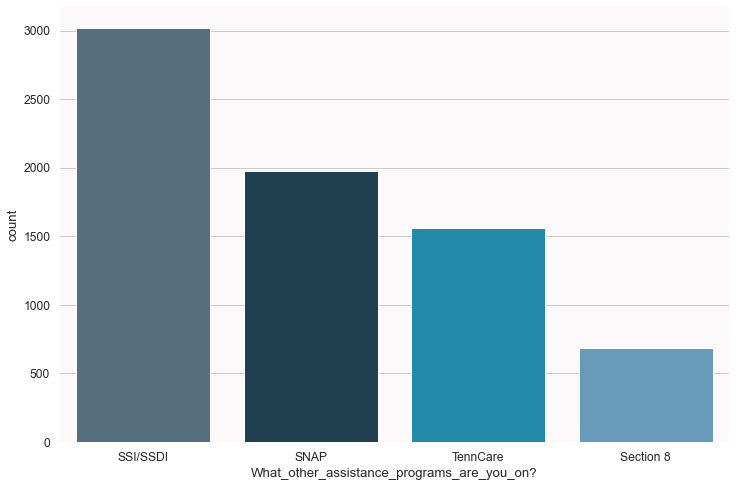

In [89]:
#sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
#sns.set_color_codes("pastel")
#sns.set_style('darkgrid')
#sns.barplot(x='People_in_Household', y=dental.People_in_Household.value_counts(), data=dental, 
#             color="b")
ax = plt.axes()
ax.set_facecolor("#FBF9F9")
ax = sns.countplot(x='What_other_assistance_programs_are_you_on?', data=mergeddental2, palette=colors, order = mergeddental2['What_other_assistance_programs_are_you_on?'].value_counts().index)
#ax.set(xlim=(1, 10), ylabel="",
#xlabel=("{What other assistance programs are Patients part of?}")
sns.despine(left=True, bottom=True)


From the 10,709 patients involved in the Smile Dental Program, approximately 46% (or 4950) answered that they receiving some sort of Government Assistance.
- this information is obtained from the original dataframe before splitting, 
- after the split we obtained accurate count per program, but this number is not per patient as the columns were "split" (receiving double or tripple values from a single patient). 

5% answered they were enrolled in 3 or more Government sponsored programs. 
18% (or 1,976) received assistance from (SNAP) Supplemental Nutrition Assistance Program - formerly known as the Food Stamp Program. 
14% (or 1561) were enrolled in TennCare.
6% (or 686) received assistance from Section 8


In [81]:
dental['What_other_assistance_programs_are_you_on?'].value_counts().sum

<bound method Series.sum of SSI/SSDI                               1962
SNAP                                    729
TennCare                                433
SNAP; TennCare                          325
SNAP; SSI/SSDI                          290
SNAP; TennCare; SSI/SSDI                279
TennCare; SSI/SSDI                      246
Section 8                               175
SNAP; Section 8                         120
SNAP; TennCare; Section 8                96
SNAP; TennCare; Section 8; SSI/SSDI      92
Section 8; SSI/SSDI                      68
TennCare; Section 8                      50
SNAP; Section 8; SSI/SSDI                45
TennCare; Section 8; SSI/SSDI            40
Name: What_other_assistance_programs_are_you_on?, dtype: int64>